In [1]:
import pandas as pd
import numpy as np
import zipfile
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import compress
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from pathlib import Path


In [2]:
df = pd.read_csv('data/scores_analysis.csv').iloc[:,1:].drop('all comments',axis=1)
df = df.rename(columns={'Score Differential': 'Final Score Differential'})
df = df.rename(columns={'spread_clean': 'Ex-ante Spread'})
df = df.rename(columns={'num_switches': 'Number of Switches'})
df = df.rename(columns={'prop_within3': 'Proportion of Time Within 3 Points'})

df.head()


,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,underdog_neg_prop,favorite_pos_prop,favorite_neg_prop,Final Score Differential,Ex-ante Spread,Favorite_Win,Proportion of Time Within 3 Points,Number of Switches,info_scrape_fav,info_scrape_dog
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.361702,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.306818,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.328859,0.390000,0.370000,6,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.305936,0.333333,0.413043,-20,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.400000,0.402827,0.360424,3,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...


In [3]:
eval_lst = ['Game thread scraped', 'Post game thread Scraped',
       'Subscribers (in thousands)', 'sentiment_scores',
            'all_comments', 'underdog_flair', 'favorite_flair',
       'underdog_sentiments', 'favorite_sentiments', 'Final Score Differential',
       'Ex-ante Spread', 'Proportion of Time Within 3 Points', 'Number of Switches']
for col in eval_lst:
    try:
        df[col] = df[col].apply(lambda x: eval(x) if type(x)==str else x)
    except:
        print(col)

In [4]:
no_flair_mean = np.mean(df['all_comments'].apply(lambda x: len([y[2] for y in x if y[2]==None])) / df['all_comments'].apply(len))
no_flair_std = np.std(df['all_comments'].apply(lambda x: len([y[2] for y in x if y[2]==None])) / df['all_comments'].apply(len))
print(f'Proportion of users with no flair on average: {no_flair_mean}')
print(f'Standard deviation of users with no flair: {no_flair_std}')


Proportion of users with no flair on average: 0.16478061933267918
Standard deviation of users with no flair: 0.041780293843197036


In [5]:
lists = [eval(x) if type(x) == str else x for x in list(pd.read_csv('AI/progress.csv')['lists'])]
df['sentiment_scores'] = lists
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,underdog_neg_prop,favorite_pos_prop,favorite_neg_prop,Final Score Differential,Ex-ante Spread,Favorite_Win,Proportion of Time Within 3 Points,Number of Switches,info_scrape_fav,info_scrape_dog
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.361702,0.437500,0.281250,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.306818,0.333333,0.240741,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.328859,0.390000,0.370000,6,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.305936,0.333333,0.413043,-20,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.400000,0.402827,0.360424,3,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...


In [6]:
def prop_calculator(analysed_lst):
    if len(analysed_lst) == 0:
        return np.NaN
    proportion_pos = analysed_lst.count(1) / len(analysed_lst)
    proportion_neg = analysed_lst.count(-1) / len(analysed_lst)
    return (proportion_pos, proportion_neg)
df['props'] = df['sentiment_scores'].apply(prop_calculator)

In [7]:
all_underdog_sentiments = []
all_favorite_sentiments = []
for j in range(len(df)):
    all_underdog_sentiments = all_underdog_sentiments + [list(compress(df['sentiment_scores'][j], df['underdog_flair'][j]))]
    all_favorite_sentiments = all_favorite_sentiments + [list(compress(df['sentiment_scores'][j], df['favorite_flair'][j]))]
df['underdog_sentiments'] = all_underdog_sentiments
df['favorite_sentiments'] = all_favorite_sentiments


In [8]:
df['underdog_props'] = df['underdog_sentiments'].apply(prop_calculator)
df['favorite_props'] = df['favorite_sentiments'].apply(prop_calculator)

In [9]:
for i in ['underdog','favorite']:
    df[f'{i}_pos_prop'] = [x[0] if type(x) == tuple else np.NaN for x in df[f'{i}_props']]
    df[f'{i}_neg_prop'] = [x[1] if type(x) == tuple else np.NaN for x in df[f'{i}_props']]
    df.head()

In [10]:
num_no_dog_comment = len([i for i in range(len(df['underdog_props'])) if type(df['underdog_props'][i])!= tuple 
     and type(df['underdog_props'][i])!= list and 
     np.isnan(df['underdog_props'][i])])
num_no_fav_comment = len([i for i in range(len(df['favorite_props'])) if type(df['favorite_props'][i])!= tuple 
     and type(df['favorite_props'][i])!= list and 
     np.isnan(df['favorite_props'][i])])
print(f'There are {num_no_dog_comment} game threads with no comments from the fans of the underdog team and \
{num_no_fav_comment} game threads with no comments from the fans of the favorite team.')

There are 62 game threads with no comments from the fans of the underdog team and 19 game threads with no comments from the fans of the favorite team.


In [11]:
df['spread_w_neg'] = df['Ex-ante Spread']
df.loc[(df['Final Score Differential'] < 0),'spread_w_neg'] = df.loc[(df['Final Score Differential'] < 0),'Ex-ante Spread']*-1
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,favorite_pos_prop,favorite_neg_prop,Final Score Differential,Ex-ante Spread,Favorite_Win,Proportion of Time Within 3 Points,Number of Switches,info_scrape_fav,info_scrape_dog,spread_w_neg
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,0.343750,0.593750,-15,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,0.259259,0.388889,9,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,0.300000,0.500000,6,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,0.152174,0.695652,-20,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,0.257951,0.561837,3,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0


In [12]:
df['num_underdog_comments'] = df['underdog_flair'].apply(sum)
df['num_favorite_comments'] = df['favorite_flair'].apply(sum)
df['num_neutral_comments'] = df['all_comments'].apply(len) - df['num_underdog_comments'] - df['num_favorite_comments']
df.head()

,Season,Week,Day,Date,Time (ET),Unnamed: 5,Favorite,Score,Spread,Unnamed: 9,...,Ex-ante Spread,Favorite_Win,Proportion of Time Within 3 Points,Number of Switches,info_scrape_fav,info_scrape_dog,spread_w_neg,num_underdog_comments,num_favorite_comments,num_neutral_comments
0,2017,1,Thu,2017-09-07,8:30,@,New England Patriots,L 27-42,L -8,NaN,...,8.0,L,0.551944,6,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-8.0,47,32,495
1,2017,1,Sun,2017-09-10,1:00,@,Buffalo Bills,W 21-12,W -7,NaN,...,7.0,W,0.544167,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,7.0,88,108,145
2,2017,1,Sun,2017-09-10,1:00,NaN,Atlanta Falcons,W 23-17,L -6.5,@,...,6.5,W,0.797778,5,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,6.5,149,200,183
3,2017,1,Sun,2017-09-10,1:00,@,Cincinnati Bengals,L 0-20,L -2.5,NaN,...,2.5,L,0.468889,1,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,-2.5,219,138,144
4,2017,1,Sun,2017-09-10,1:00,NaN,Pittsburgh Steelers,W 21-18,L -10,@,...,10.0,W,0.341389,3,https://www.pro-football-reference.com/boxscor...,https://www.pro-football-reference.com/boxscor...,10.0,60,283,187


# Sentiment Graphs

In [13]:
ante_close = (df['Ex-ante Spread'] < 4)
ante_blowout = (df['Ex-ante Spread'] >= 4)
post_fav = (df['Final Score Differential'] >= 4)
post_close = (df['Final Score Differential'] < 4) & (df['Final Score Differential'] > -4)
post_dog = (df['Final Score Differential'] <= -4)

In [14]:
def custom_round(x, base=5):
    return base * round(x.astype(float)/base)

In [15]:
def make_sentiment_graph(df, title='', filter_col = 'Final Score Differential', prop = False, 
                         ax = None, weighted = True, round_num = 1):
    if prop:
        scores = np.arange(0,1.01,0.01)
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    mean_pos_dog_prop = []
    mean_neg_dog_prop = []
    mean_pos_fav_prop = []
    mean_neg_fav_prop = []
    num = []
    for i in scores:
        smoll_df = df[custom_round(df[filter_col],round_num)==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_neg_dog_prop.append(np.nan)
            mean_pos_dog_prop.append(np.nan)
            mean_pos_fav_prop.append(np.nan)
            mean_neg_fav_prop.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_pos_dog_prop.append(smoll_df['underdog_pos_prop'].mean())
            mean_neg_dog_prop.append(smoll_df['underdog_neg_prop'].mean())
            mean_pos_fav_prop.append(smoll_df['favorite_pos_prop'].mean())
            mean_neg_fav_prop.append(smoll_df['favorite_neg_prop'].mean())

    dog_prop = [mean_pos_dog_prop[i]/(mean_pos_dog_prop[i] + mean_neg_dog_prop[i]) for i in range(len(mean_pos_dog_prop))]
    fav_prop = [mean_pos_fav_prop[i]/(mean_pos_fav_prop[i] + mean_neg_fav_prop[i]) for i in range(len(mean_pos_fav_prop))]

    min_1 = min([x for x in dog_prop if not np.isnan(x)])
    min_2 = min([x for x in fav_prop if not np.isnan(x)])

    max_1 = max([x for x in dog_prop if not np.isnan(x)])
    max_2 = max([x for x in fav_prop if not np.isnan(x)])
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_title(title)
    if weighted:
        ax.scatter(scores, dog_prop, label='Underdog Proportion Positive', color = 'g',s=num)
        ax.scatter(scores, fav_prop, label='Favorite Proportion Positive', color = 'r',s=num)
    else:
        ax.scatter(scores, dog_prop, label='Underdog Proportion Positive', color = 'g')
        ax.scatter(scores, fav_prop, label='Favorite Proportion Positive', color = 'r')
    ax.legend()
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Average Proportion of Comments')
    ax.set_ylim(min(min_1, min_2)-0.02, max(max_1,max_2)+0.02)
    
    return min(min_1, min_2), max(max_1,max_2)

## Sentiment vs Final Score

In [16]:
df_2 = pd.read_csv('data/scores_analysis.csv').iloc[:,1:].drop('all comments',axis=1)
df_2 = df_2.rename(columns={'Score Differential': 'Final Score Differential'})
eval_lst = ['Game thread scraped', 'Post game thread Scraped',
       'Subscribers (in thousands)', 'sentiment_scores',
            'all_comments', 'underdog_flair', 'favorite_flair',
       'underdog_sentiments', 'favorite_sentiments', 'Final Score Differential',
    'prop_within3', 'num_switches']
for col in eval_lst:
    try:
        df_2[col] = df_2[col].apply(lambda x: eval(x) if type(x)==str else x)
    except:
        print(col)

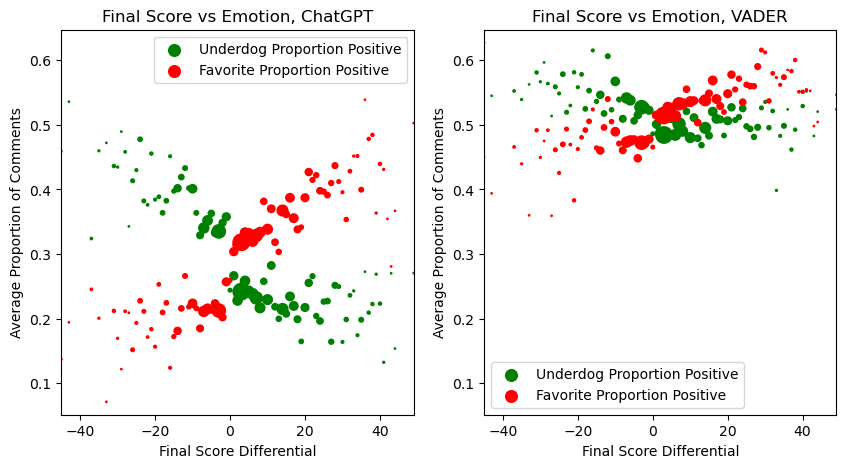

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

weighted_all = True
filter_col_all = 'Final Score Differential'
round_num_all = 1

min_1, max_1 = make_sentiment_graph(df, 
                                    title='Final Score vs Emotion, ChatGPT', round_num=1,
                     filter_col = filter_col_all, prop = False, ax = axs[0], weighted = True)

min_2, max_2 = make_sentiment_graph(df_2, 
                                    title='Final Score vs Emotion, VADER', round_num=1,
                     filter_col = filter_col_all, prop = False, ax = axs[1], weighted = True)

axs[0].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[0].set_xlim(df[filter_col_all].min(), 
                df[filter_col_all].max())
axs[1].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[1].set_xlim(df_2[filter_col_all].min(), 
                df_2[filter_col_all].max());
# More F-tests, close is symmetric while blowout is not

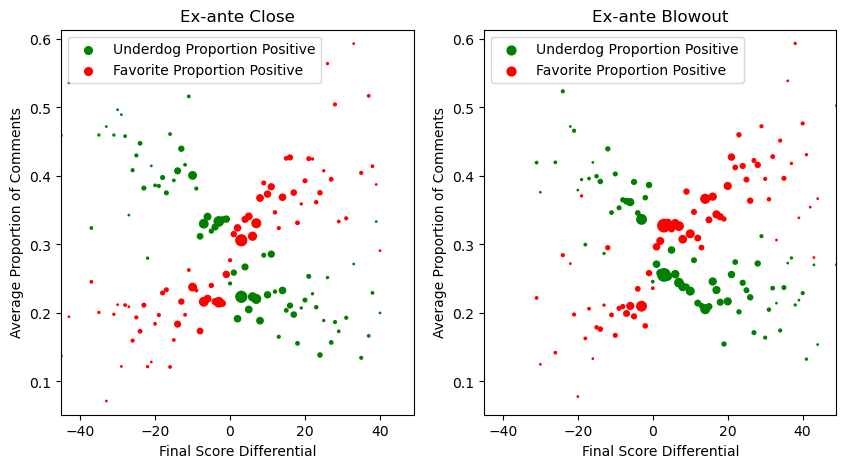

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'hspace': 0.3})

weighted_all = True
filter_col_all = 'Final Score Differential'
round_num_all = 1

min_1, max_1 = make_sentiment_graph(df[ante_close], round_num=round_num_all,
                     title='Ex-ante Close', 
                     filter_col = filter_col_all, prop = False, ax = axs[0], weighted = weighted_all)

min_2, max_2 = make_sentiment_graph(df[ante_blowout], round_num=round_num_all,
                     title='Ex-ante Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1], weighted = weighted_all)

axs[0].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1].set_ylim(min(min_1, min_2)-0.02, 
                   max(max_1,max_2)+0.02)
axs[1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());
# More F-tests, close is symmetric while blowout is not

In [19]:
round_num = 1
filter_col = 'Final Score Differential'
prop = False
weighted = True

scores = range(math.floor(df[ante_close][filter_col].min()),math.ceil(df[ante_close][filter_col].max())+1)

mean_prop_dog_win_close_fav = []
mean_prop_fav_win_close_fav = []
mean_prop_dog_win_close_dog = []
mean_prop_fav_win_close_dog = []
num = []
for i in scores:
    smoll_df = df[ante_close][custom_round(df[ante_close][filter_col],round_num)==i]
    if i < 0 and i >= -30:
        if len(smoll_df)==0:
            num.append(0)
            # mean_prop_dog_win_close.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_prop_dog_win_close_dog.append(smoll_df['underdog_pos_prop'].mean()/ \
                                    (smoll_df['underdog_pos_prop'].mean() + smoll_df['underdog_neg_prop'].mean()))
            mean_prop_dog_win_close_fav.append(smoll_df['favorite_pos_prop'].mean()/ \
                                    (smoll_df['favorite_pos_prop'].mean() + smoll_df['favorite_neg_prop'].mean()))
    elif i > 0 and i <= 30:
        if len(smoll_df)==0:
            num.append(0)
            # mean_prop_fav_win_close.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_prop_fav_win_close_dog.append(smoll_df['underdog_pos_prop'].mean()/ \
                                    (smoll_df['underdog_pos_prop'].mean() + smoll_df['underdog_neg_prop'].mean()))
            mean_prop_fav_win_close_fav.append(smoll_df['favorite_pos_prop'].mean()/ \
                                    (smoll_df['favorite_pos_prop'].mean() + smoll_df['favorite_neg_prop'].mean()))

In [20]:
round_num = 1
filter_col = 'Final Score Differential'
prop = False
weighted = True

if prop:
    scores = np.arange(0,1.01,0.01)
else:
    scores = range(math.floor(df[ante_blowout][filter_col].min()),math.ceil(df[ante_blowout][filter_col].max())+1)

mean_prop_dog_win_blowout_fav = []
mean_prop_fav_win_blowout_fav = []
mean_prop_dog_win_blowout_dog = []
mean_prop_fav_win_blowout_dog = []
num = []
for i in scores:
    smoll_df = df[ante_blowout][custom_round(df[ante_blowout][filter_col],round_num)==i]
    if i < 0:
        if len(smoll_df)==0:
            num.append(0)
            # mean_prop_dog_win_blowout.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_prop_dog_win_blowout_dog.append(smoll_df['underdog_pos_prop'].mean()/ \
                                    (smoll_df['underdog_pos_prop'].mean() + smoll_df['underdog_neg_prop'].mean()))
            mean_prop_dog_win_blowout_fav.append(smoll_df['favorite_pos_prop'].mean()/ \
                                    (smoll_df['favorite_pos_prop'].mean() + smoll_df['favorite_neg_prop'].mean()))
    elif i >= 0:
        if len(smoll_df)==0:
            num.append(0)
            # mean_prop_fav_win_blowout.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_prop_fav_win_blowout_dog.append(smoll_df['underdog_pos_prop'].mean()/ \
                                    (smoll_df['underdog_pos_prop'].mean() + smoll_df['underdog_neg_prop'].mean()))
            mean_prop_fav_win_blowout_fav.append(smoll_df['favorite_pos_prop'].mean()/ \
                                    (smoll_df['favorite_pos_prop'].mean() + smoll_df['favorite_neg_prop'].mean()))


In [21]:
# Create the data for two groups
group1 = [x for x in mean_prop_dog_win_close_fav if not np.isnan(x) and x != 0]
group2 = [x for x in mean_prop_fav_win_close_dog if not np.isnan(x) and x != 0]
 
# Calculate the sample variances
variance1 = np.var(group1)
variance2 = np.var(group2)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print(np.mean(group1),np.mean(group2))
print(np.mean(group2) - np.mean(group1))

print(stats.ttest_ind(group1,group2,equal_var=False))
mannwhitneyu(group1, group2)

0.19841987293782357 0.21326268543043087
0.014842812492607299
TtestResult(statistic=-1.4977541244228894, pvalue=0.13971601127404157, df=56.98797257918324)


MannwhitneyuResult(statistic=368.0, pvalue=0.31332466997401065)

In [22]:
group1 = [x for x in mean_prop_dog_win_close_dog if not np.isnan(x) and x != 0]
group2 = [x for x in mean_prop_fav_win_close_fav if not np.isnan(x) and x != 0]

# Calculate the sample variances
variance1 = np.var(group1)
variance2 = np.var(group2)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print(np.mean(group1),np.mean(group2))
print(np.mean(group2) - np.mean(group1))

print(stats.ttest_ind(group1,group2,equal_var=False))
mannwhitneyu(group1, group2)

0.3915225424306016 0.3767015791883242
-0.014820963242277385
TtestResult(statistic=0.9787427883291455, pvalue=0.3318430475058365, df=56.99939120466514)


MannwhitneyuResult(statistic=521.0, pvalue=0.19485573748353424)

In [23]:
# Create the data for two groups
group1 = [x for x in mean_prop_dog_win_blowout_fav if not np.isnan(x) and x != 0]
group2 = [x for x in mean_prop_fav_win_blowout_dog if not np.isnan(x) and x != 0]
 
# Calculate the sample variances
variance1 = np.var(group1)
variance2 = np.var(group2)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print(np.mean(group1),np.mean(group2))
print(np.mean(group2) - np.mean(group1))

print(stats.ttest_ind(group1,group2,equal_var=False))
mannwhitneyu(group1, group2)

0.20481690640183875 0.2316928640370821
0.026875957635243364
TtestResult(statistic=-2.0707228883038673, pvalue=0.045295993197327335, df=37.629232980046645)


MannwhitneyuResult(statistic=352.0, pvalue=0.005521102070446182)

In [24]:
group1 = [x for x in mean_prop_dog_win_blowout_dog if not np.isnan(x) and x != 0]
group2 = [x for x in mean_prop_fav_win_blowout_fav if not np.isnan(x) and x != 0]

# Calculate the sample variances
variance1 = np.var(group1)
variance2 = np.var(group2)
 
# Calculate the F-statistic
f_value = variance1 / variance2
 
# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1
 
# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)
 
# Print the results
print(np.mean(group1),np.mean(group2))
print(np.mean(group2) - np.mean(group1))

print(stats.ttest_ind(group1,group2,equal_var=False))
mannwhitneyu(group1, group2)

0.3887132057184442 0.3769551908685299
-0.011758014849914289
TtestResult(statistic=0.8131526242022323, pvalue=0.41907402481138745, df=65.55647568848711)


MannwhitneyuResult(statistic=695.0, pvalue=0.2579144543267142)

## Sentiment vs Spread

In [25]:
# fig, axs = plt.subplots(4, 1, figsize=(9, 12), gridspec_kw={'hspace': 0.5})

# weighted_all = True
# filter_col_all = 'Ex-ante Spread'
# round_num_all=1

# min_1, max_1 = make_sentiment_graph(df[post_dog], round_num=round_num_all,
#                      title='Ex-post Underdog Blowout', 
#                      filter_col = filter_col_all, prop = False, ax = axs[0], weighted = weighted_all)

# min_2, max_2 = make_sentiment_graph(df[post_close & (df['Final Score Differential'] < 0)], 
#                      title='Ex-post Close & Underdog Wins', round_num=round_num_all,
#                      filter_col = filter_col_all, prop = False, ax = axs[1], weighted = weighted_all)

# min_4, max_4 = make_sentiment_graph(df[post_close & (df['Final Score Differential'] >= 0)], 
#                      title='Ex-post Close & Favorite Wins', round_num=round_num_all,
#                      filter_col = filter_col_all, prop = False, ax = axs[2], weighted = weighted_all)

# min_3, max_3 = make_sentiment_graph(df[post_fav], round_num=round_num_all,
#                      title='Ex-post Favorite Blowout', 
#                      filter_col = filter_col_all, prop = False, ax = axs[3], weighted = weighted_all)

# axs[0].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
#                    max(max_1,max_2, max_3,max_4)+0.02)
# axs[0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[1].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
#                    max(max_1,max_2, max_3,max_4)+0.02)
# axs[1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[2].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
#                    max(max_1,max_2, max_3,max_4)+0.02)
# axs[2].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[3].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
#                    max(max_1,max_2, max_3,max_4)+0.02)
# axs[3].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

In [26]:
# make_sentiment_graph(df, round_num=1,
#                      title='Ex-post Underdog Blowout', 
#                      filter_col = filter_col_all, prop = False, weighted = weighted_all)

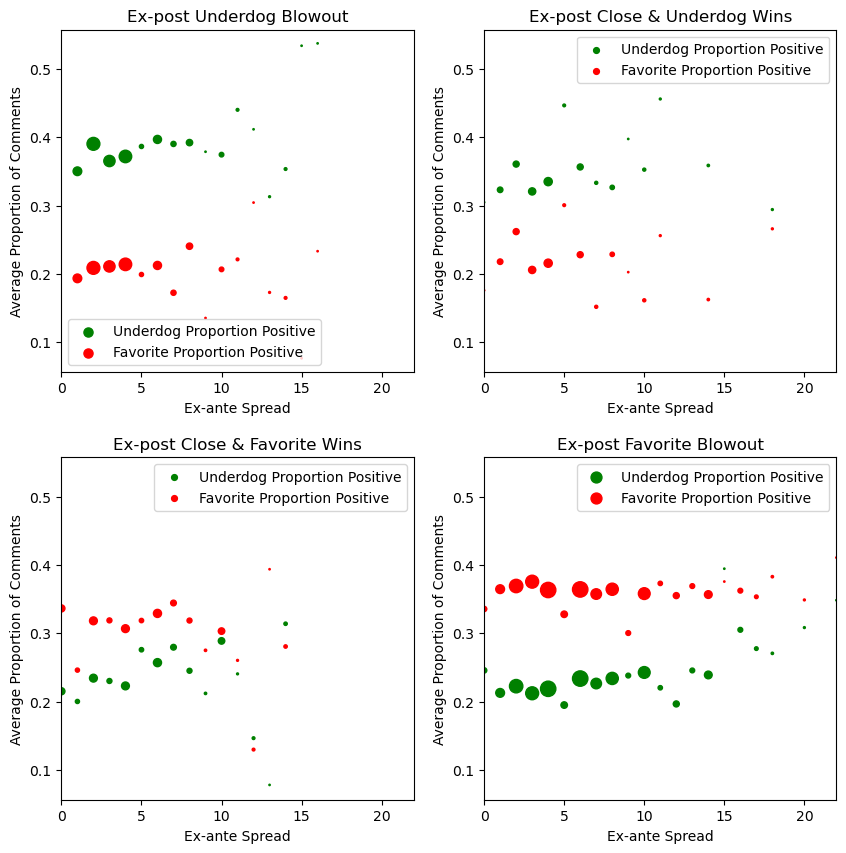

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'hspace': 0.25})

weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all=1

min_1, max_1 = make_sentiment_graph(df[post_dog], round_num=round_num_all,
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all)

min_2, max_2 = make_sentiment_graph(df[post_close & (df['Final Score Differential'] < 0)], 
                     title='Ex-post Close & Underdog Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_4, max_4 = make_sentiment_graph(df[post_close & (df['Final Score Differential'] >= 0)], 
                     title='Ex-post Close & Favorite Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all)

min_3, max_3 = make_sentiment_graph(df[post_fav], round_num=round_num_all,
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all)

axs[0][0].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
                   max(max_1,max_2, max_3,max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
                   max(max_1,max_2, max_3,max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
                   max(max_1,max_2, max_3,max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3,min_4)-0.02, 
                   max(max_1,max_2, max_3,max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

In [28]:
def make_sentiment_graph_props(df, title='', filter_col = 'Final Score Differential', prop = False, 
                         ax = None, weighted = True, round_num = 1):
    if prop:
        scores = np.arange(0,1.01,0.01)
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    mean_pos_dog_prop = []
    mean_neg_dog_prop = []
    mean_pos_fav_prop = []
    mean_neg_fav_prop = []
    num = []
    for i in scores:
        smoll_df = df[custom_round(df[filter_col],round_num)==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_neg_dog_prop.append(np.nan)
            mean_pos_dog_prop.append(np.nan)
            mean_pos_fav_prop.append(np.nan)
            mean_neg_fav_prop.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_pos_dog_prop.append(smoll_df['underdog_pos_prop'].mean())
            mean_neg_dog_prop.append(smoll_df['underdog_neg_prop'].mean())
            mean_pos_fav_prop.append(smoll_df['favorite_pos_prop'].mean())
            mean_neg_fav_prop.append(smoll_df['favorite_neg_prop'].mean())

    dog_prop = [mean_pos_dog_prop[i]/(mean_pos_dog_prop[i] + mean_neg_dog_prop[i]) for i in range(len(mean_pos_dog_prop))]
    fav_prop = [mean_pos_fav_prop[i]/(mean_pos_fav_prop[i] + mean_neg_fav_prop[i]) for i in range(len(mean_pos_fav_prop))]
    
    return (dog_prop,fav_prop)#([x for x in dog_prop if not np.isnan(x)], [x for x in fav_prop if not np.isnan(x)])

In [29]:
weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all=1
dog_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] < 0)], 
                     title='Ex-post Close & Underdog Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)
fav_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] >= 0)], 
                     title='Ex-post Close & Favorite Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all)

group1 = [x for x in fav_close[0] if not np.isnan(x)]
group2 = [x for x in dog_close[1] if not np.isnan(x)]
print(f'Underdog reactions in favorite close mean: {np.mean(group1)}, \
Favorite reactions in underdog close mean: {np.mean(group2)}') # comparing close losers
print(np.mean(group1) - np.mean(group2))
print(stats.ttest_ind(group1, group2, equal_var=False))
mannwhitneyu(group1, group2)

Underdog reactions in favorite close mean: 0.22932439762569154, Favorite reactions in underdog close mean: 0.21659192701282534
0.012732470612866198
TtestResult(statistic=0.6632414110296173, pvalue=0.5130219605209845, df=25.96419689613069)


MannwhitneyuResult(statistic=128.0, pvalue=0.3261094520204889)

In [30]:
weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all=1
dog_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] < 0)], 
                     title='Ex-post Close & Underdog Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)
fav_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] >= 0)], 
                     title='Ex-post Close & Favorite Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all)

group1 = [x for x in dog_close[0] if not np.isnan(x)]
group2 = [x for x in fav_close[1] if not np.isnan(x)]
print(f'Underdog reactions in underdog close mean: {np.mean(group1)}, \
Favorite reactions in favorite blowout mean: {np.mean(group2)}') # comparing close winners
print(np.mean(group1) - np.mean(group2))
print(stats.ttest_ind(group1, group2, equal_var=False))
mannwhitneyu(group1, group2)

Underdog reactions in underdog close mean: 0.35478562968551014, Favorite reactions in favorite blowout mean: 0.29871845849980566
0.05606717118570448
TtestResult(statistic=2.7986616969385523, pvalue=0.009428587662519933, df=26.589478024504064)


MannwhitneyuResult(statistic=169.0, pvalue=0.00558214360906498)

In [31]:
weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all=1
dog_blowout = make_sentiment_graph_props(df[post_dog], round_num=round_num_all,
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all)
fav_blowout = make_sentiment_graph_props(df[post_fav], round_num=round_num_all,
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all)

group1 = [x for x in fav_blowout[0] if not np.isnan(x)]
group2 = [x for x in dog_blowout[1] if not np.isnan(x)]
print(f'Favorite reactions in underdog blowout mean: {np.mean(group1)}, \
Underdog reactions in favorite blowout mean: {np.mean(group2)}') # comparing blowout losers
print(np.mean(group1) - np.mean(group2))
print(stats.ttest_ind(group1, group2, equal_var=False))
mannwhitneyu(group1, group2)

Favorite reactions in underdog blowout mean: 0.2517886292117723, Underdog reactions in favorite blowout mean: 0.19772793570990635
0.05406069350186596
TtestResult(statistic=3.257953904464901, pvalue=0.0026165501258211443, df=32.73113149999204)


MannwhitneyuResult(statistic=278.0, pvalue=0.0007881081620977142)

In [32]:
weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all=1
dog_blowout = make_sentiment_graph_props(df[post_dog], round_num=round_num_all,
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all)
fav_blowout = make_sentiment_graph_props(df[post_fav], round_num=round_num_all,
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all)

group1 = [x for x in dog_blowout[0] if not np.isnan(x)]
group2 = [x for x in fav_blowout[1] if not np.isnan(x)]
print(f'Underdog reactions in underdog blowout mean: {np.mean(group1)}, \
Favorite reactions in favorite blowout mean: {np.mean(group2)}') # comparing blowout winners
print(np.mean(group1) - np.mean(group2))
print(stats.ttest_ind(group1, group2, equal_var=False))
mannwhitneyu(group1, group2)

Underdog reactions in underdog blowout mean: 0.3992605212658732, Favorite reactions in favorite blowout mean: 0.3605568346836271
0.0387036865822461
TtestResult(statistic=2.4507981723284042, pvalue=0.024714161533206422, df=17.981804932052395)


MannwhitneyuResult(statistic=259.0, pvalue=0.005529419631421858)

In [33]:
dog_blowout = make_sentiment_graph_props(df[post_dog], round_num=round_num_all,
                     title='Ex-post Underdog Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all)
dog_blowout_diffs = [dog_blowout[0][i] - dog_blowout[1][i] for i in range(len(dog_blowout[0])) 
         ]


In [34]:
dog_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] < 0)], 
                     title='Ex-post Close & Underdog Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)
dog_close_diffs = [dog_close[0][i] - dog_close[1][i] for i in range(len(dog_close[0])) 
         ]


In [35]:
dog_arr = [dog_blowout_diffs[i] - dog_close_diffs[i] for i in range(min(len(dog_blowout_diffs),len(dog_close_diffs)))
if not np.isnan(dog_blowout_diffs[i] - dog_close_diffs[i])]

def bootstrap_CI(data, num_samples, alpha=0.05):
    """
    Compute the bootstrap confidence interval for the mean of the data.

    Parameters:
    - data: 1-D array-like data
    - num_samples: number of bootstrap samples
    - alpha: significance level (default: 0.05)

    Returns:
    - tuple: (lower_bound, upper_bound) of the confidence interval
    """
    means = np.zeros(num_samples)
    n = len(data)
    for i in range(num_samples):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        means[i] = np.mean(bootstrap_sample)
    
    # Sort the bootstrap sample means
    means.sort()

    # Compute the percentile-based confidence interval
    alpha_percentile = 100 * (alpha / 2)
    lower_percentile = alpha_percentile
    upper_percentile = 100 - alpha_percentile
    lower_bound = np.percentile(means, lower_percentile)
    upper_bound = np.percentile(means, upper_percentile)
    
    return lower_bound, upper_bound

# Example usage:
num_bootstrap_samples = 1000  # Number of bootstrap samples

# Compute the confidence interval
lower_bound, upper_bound = bootstrap_CI(dog_arr, num_bootstrap_samples)

print("95% Confidence Interval for the Mean of dog_arr:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


95% Confidence Interval for the Mean of dog_arr:
Lower Bound: 0.009947874916204169
Upper Bound: 0.09714241707892116


In [36]:
fav_close = make_sentiment_graph_props(df[post_close & (df['Final Score Differential'] >= 0)], 
                     title='Ex-post Close & Favorite Wins', round_num=round_num_all,
                     filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all)
fav_close_diffs = [fav_close[1][i] - fav_close[0][i] for i in range(len(fav_close[1])) 
         if not np.isnan(fav_close[0][i] - fav_close[1][i])]


In [37]:
fav_blowout = make_sentiment_graph_props(df[post_fav], round_num=round_num_all,
                     title='Ex-post Favorite Blowout', 
                     filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all)
fav_blowout_diffs = [fav_blowout[1][i] - fav_blowout[0][i] for i in range(len(fav_blowout[1])) 
         if not np.isnan(fav_blowout[0][i] - fav_blowout[1][i])]


In [38]:
fav_arr = [fav_blowout_diffs[i] - fav_close_diffs[i] for i in range(min(len(fav_blowout_diffs),len(fav_close_diffs)))
if not np.isnan(fav_blowout_diffs[i] - fav_close_diffs[i])]

# Example usage:
num_bootstrap_samples = 1000  # Number of bootstrap samples

# Compute the confidence interval
lower_bound, upper_bound = bootstrap_CI(fav_arr, num_bootstrap_samples)

print("95% Confidence Interval for the Mean of fav_arr:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


95% Confidence Interval for the Mean of fav_arr:
Lower Bound: 0.012922284840760294
Upper Bound: 0.0998066891659039


# Number of Comments Graphs

In [39]:
# df_3 = df.rename(columns={'num_underdog_comments': 'Number of Comments by Fans of the Underdog Team',
#                   'num_favorite_comments': 'Number of Comments by Fans of the Favorite Team'})
# df_3['Number of Total Comments'] = df_3['all_comments'].apply(len)
# table = df_3[['Number of Comments by Fans of the Underdog Team','Number of Comments by Fans of the Favorite Team',
#      'Number of Total Comments']].describe()#.style.to_latex(caption='A Table', label='tab:descriptive')
# with open('/Users/rohanjha/Documents/GitHub/econ_h195b/exploring/desc.tex', 'w') as f:
#     f.write(table.style.to_latex(caption='A Table', label='tab:descriptive'))

In [40]:
def make_num_comments_graph(df, title='', filter_col = 'Final Score Differential', fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments'],
                            prop = False, round_num = 1, ax = None, weighted = True, clr = 'b',custom_range=()):
    if prop:
        scores = np.arange(0,1.01,0.01)
    elif custom_range != ():
        scores = range(custom_range[0],custom_range[1])
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    
    df['fans_col'] = df[fans_list[0]]
    if len(fans_list) > 1:
        for fans in fans_list[1:]:
            df['fans_col'] = df['fans_col'] + df[fans]
    df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])
    
    mean_fans_comments = []
    num = []
    
    for i in scores:
        smoll_df = df[custom_round(df[filter_col],round_num)==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_fans_comments.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_fans_comments.append(smoll_df['fans_col_std'].mean())

    min_1 = min([x for x in mean_fans_comments if not np.isnan(x)])

    max_1 = max([x for x in mean_fans_comments if not np.isnan(x)])
    
    if ax is None:
        ax = plt.gca()
        
    ax.set_title(title)
    if weighted:
        ax.scatter(scores, mean_fans_comments, color = clr,s=num)
    else:
        ax.scatter(scores, mean_fans_comments, color = clr)
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Standardized Number of Comments')
    ax.set_ylim(min_1-0.02, max_1+0.02)
    
    return min_1, max_1

## Number of Comments vs Final Score


In [41]:
# np.corrcoef(np.abs(df['Final Score Differential']), df['Number of Switches'])

In [42]:
# np.corrcoef(np.abs(df['Final Score Differential']), df['Proportion of Time Within 3 Points'])

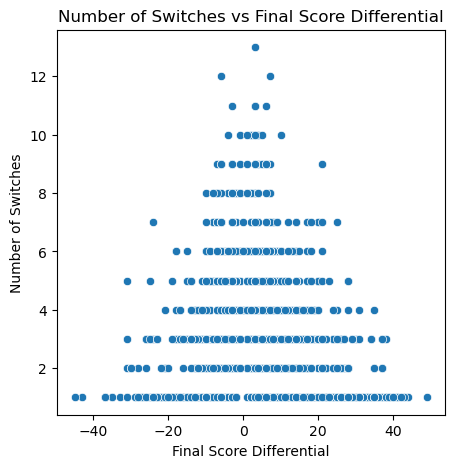

In [43]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=df['Final Score Differential'],y = df['Number of Switches']);
plt.title("Number of Switches vs Final Score Differential");
#plt.xlabel("Absolute Value of Final Score Differential");
# if weighted:
#     ax.scatter(scores, mean_fans_comments, color = clr,s=num)
# else:
#     ax.scatter(scores, mean_fans_comments, color = clr)
# ax.set_xlabel(filter_col)
# ax.set_ylabel('Standardized Number of Comments')
# ax.set_ylim(min_1-0.02, max_1+0.02)

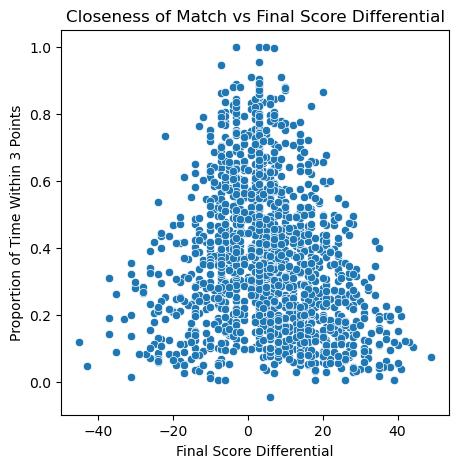

In [44]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=df['Final Score Differential'],y = df['Proportion of Time Within 3 Points'], alpha = 1);
plt.title("Closeness of Match vs Final Score Differential");

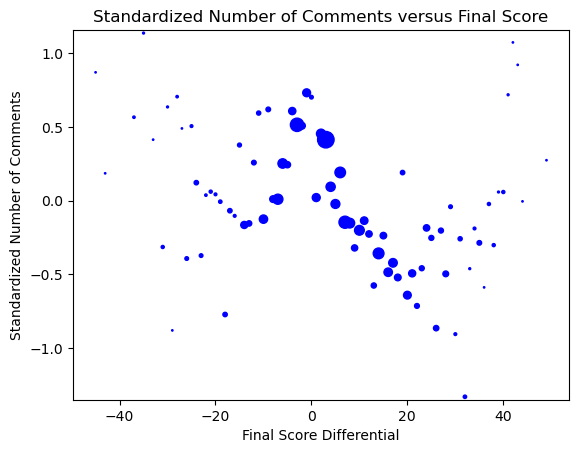

In [45]:
make_num_comments_graph(df, title='Standardized Number of Comments versus Final Score', round_num = 1,
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

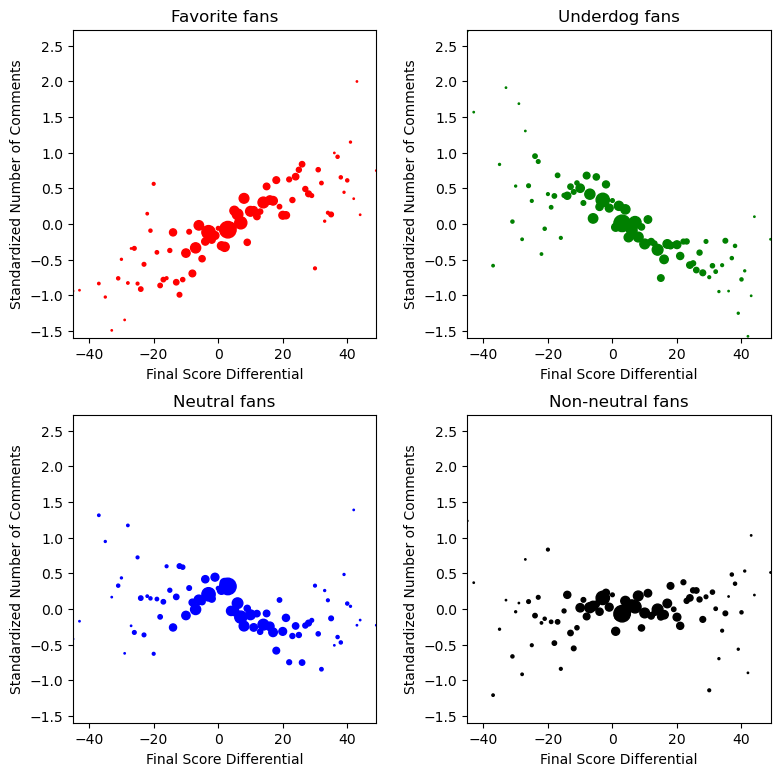

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25,'wspace':0.3})

weighted_all = True
filter_col_all = 'Final Score Differential'
round_num_all = 1

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', 
                        fans_list = ['num_underdog_comments'],round_num=round_num_all,
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', 
                        fans_list = ['num_neutral_comments'],round_num=round_num_all,
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', 
                        fans_list = ['num_favorite_comments'],round_num=round_num_all,
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', round_num=round_num_all,
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

In [47]:
def make_num_comments_graph_vals(df, title='', filter_col = 'Final Score Differential', fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments'],
                            prop = False, round_num = 1, ax = None, weighted = True, clr = 'b',less0=False,great0=False,custom_range=()):
    if prop:
        scores = np.arange(0,1.01,0.01)
    elif custom_range != ():
        scores = range(custom_range[0],custom_range[1])
    elif less0:
        scores = range(math.floor(df[filter_col].min()),0) 
    elif great0:
        scores = range(0,math.ceil(df[filter_col].max())+1) 
    else:
        scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1) 
        # range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1) 
    
    df['fans_col'] = df[fans_list[0]]
    if len(fans_list) > 1:
        for fans in fans_list[1:]:
            df['fans_col'] = df['fans_col'] + df[fans]
    df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])
    
    mean_fans_comments = []
    num = []
    
    for i in scores:
        smoll_df = df[custom_round(df[filter_col],round_num)==i]
        if len(smoll_df)==0:
            num.append(0)
            mean_fans_comments.append(np.nan)
        else:
            num.append(len(smoll_df))
            mean_fans_comments.append(smoll_df['fans_col_std'].mean())

    min_1 = min([x for x in mean_fans_comments if not np.isnan(x)])

    max_1 = max([x for x in mean_fans_comments if not np.isnan(x)])
    
    ax = plt.gca()
        
    ax.set_title(title)
    if weighted:
        ax.scatter(scores, mean_fans_comments, color = clr,s=num)
    else:
        ax.scatter(scores, mean_fans_comments, color = clr)
    ax.set_xlabel(filter_col)
    ax.set_ylabel('Standardized Number of Comments')
    ax.set_ylim(min_1-0.02, max_1+0.02)
    plt.close();
    
    return mean_fans_comments#[x for x in mean_fans_comments if not np.isnan(x)]


In [48]:
# custom_range_num = 20
# make_num_comments_graph(df, title='Neutral fans', #custom_range = (-1*custom_range_num,custom_range_num+1), #(-45,49)
#                         fans_list = ['num_neutral_comments'],round_num=round_num_all,
#                         filter_col = filter_col_all, prop = False, weighted = weighted_all);

In [49]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

title='Neutral fans'
filter_col = 'Final Score Differential'
fans_list = ['num_neutral_comments']
prop = False
round_num = 1
ax = None
weighted = True
clr = 'b'
custom_range=()

if prop:
    scores = np.arange(0,1.01,0.01)
elif custom_range != ():
    scores = range(custom_range[0],custom_range[1])
else:
    scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)
    
#scores = range(-10,10 + 1)

df['fans_col'] = df[fans_list[0]]
if len(fans_list) > 1:
    for fans in fans_list[1:]:
        df['fans_col'] = df['fans_col'] + df[fans]
df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])

mean_fans_comments = []
num = []

for i in scores:
    smoll_df = df[custom_round(df[filter_col],round_num)==i]
    if len(smoll_df)==0:
        num.append(0)
        mean_fans_comments.append(np.nan)
    else:
        num.append(len(smoll_df))
        mean_fans_comments.append(smoll_df['fans_col_std'].mean())

temp_df_neutrals = pd.DataFrame({'scores': scores,'mean_fans_comments': mean_fans_comments})
temp_df_neutrals = temp_df_neutrals.assign(threshold=(temp_df_neutrals["scores"] >= 0).astype(int))
temp_df_neutrals.head()

,scores,mean_fans_comments,threshold
0,-45,-0.421929,0
1,-44,NaN,0
2,-43,-0.172628,0
3,-42,NaN,0
4,-41,NaN,0


In [50]:
print(temp_df_neutrals[np.abs(temp_df_neutrals['scores'])<=5]['mean_fans_comments'].mean())
print(temp_df_neutrals[np.abs(temp_df_neutrals['scores'])<=10]['mean_fans_comments'].mean())
print(temp_df_neutrals[np.abs(temp_df_neutrals['scores'])<=15]['mean_fans_comments'].mean())
print(temp_df_neutrals[np.abs(temp_df_neutrals['scores'])<=20]['mean_fans_comments'].mean())
print(temp_df_neutrals[np.abs(temp_df_neutrals['scores'])<=25]['mean_fans_comments'].mean())

0.22532071139122226
0.12081369767292169
0.0955350559419872
0.041702893994483965
0.013474492510044749


In [51]:
# model = smf.wls("mean_fans_comments~scores*threshold", temp_df_neutrals).fit()

# model.summary().tables[1]

In [52]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming temp_df and model are defined

# # Scatter plot
# ax = temp_df_neutrals.plot.scatter(x="scores", y="mean_fans_comments", color="C0")

# # Overlaying regression lines
# #sns.regplot(x=temp_df.dropna()["scores"], y=model.fittedvalues, ax=ax, color="C1",fit_reg=False, line_kws={"linestyle":"-"})
# sns.regplot(x=temp_df_neutrals.dropna()[temp_df_neutrals.dropna()['scores']<0]["scores"], 
#             y=model.fittedvalues[temp_df_neutrals.dropna()['scores']<0], 
#             ax=ax, color="C1",fit_reg=True,scatter=False)
# sns.regplot(x=temp_df_neutrals.dropna()[temp_df_neutrals.dropna()['scores']>=0]["scores"], 
#             y=model.fittedvalues[temp_df_neutrals.dropna()['scores']>=0], 
#             ax=ax, color="C1",fit_reg=True,scatter=False)


# plt.title("Regression Discontinuity, Neutral Fans")
# plt.show()


In [53]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

title='Non-neutral fans'
filter_col = 'Final Score Differential'
fans_list = ['num_underdog_comments','num_favorite_comments']
prop = False
round_num = 1
ax = None
weighted = True
clr = 'b'
    
#scores = range(-20,20 + 1)

df['fans_col'] = df[fans_list[0]]
if len(fans_list) > 1:
    for fans in fans_list[1:]:
        df['fans_col'] = df['fans_col'] + df[fans]
df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])

mean_fans_comments = []
num = []

for i in scores:
    smoll_df = df[custom_round(df[filter_col],round_num)==i]
    if len(smoll_df)==0:
        num.append(0)
        mean_fans_comments.append(np.nan)
    else:
        num.append(len(smoll_df))
        mean_fans_comments.append(smoll_df['fans_col_std'].mean())

temp_df_nonneutrals_scores = pd.DataFrame({'scores': scores,'mean_fans_comments': mean_fans_comments})
#temp_df_nonneutrals_scores = temp_df_nonneutrals_scores.assign(threshold=(temp_df_nonneutrals_scores["scores"] >= 0).astype(int))
temp_df_nonneutrals_scores.head()

,scores,mean_fans_comments
0,-45,1.234041
1,-44,NaN
2,-43,0.367646
3,-42,NaN
4,-41,NaN


In [54]:
print(temp_df_nonneutrals_scores[np.abs(temp_df_nonneutrals_scores['scores'])<=5]['mean_fans_comments'].mean())
print(temp_df_nonneutrals_scores[np.abs(temp_df_nonneutrals_scores['scores'])<=10]['mean_fans_comments'].mean())
print(temp_df_nonneutrals_scores[np.abs(temp_df_nonneutrals_scores['scores'])<=15]['mean_fans_comments'].mean())
print(temp_df_nonneutrals_scores[np.abs(temp_df_nonneutrals_scores['scores'])<=20]['mean_fans_comments'].mean())
print(temp_df_nonneutrals_scores[np.abs(temp_df_nonneutrals_scores['scores'])<=25]['mean_fans_comments'].mean())

0.026039061435393793
0.015273022336477518
-0.023181585335843642
-0.033487854675989845
-0.029108209622933694


In [55]:
# model = smf.wls("mean_fans_comments~scores*threshold", temp_df_nonneutrals).fit()

# model.summary().tables[1]

In [56]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming temp_df and model are defined

# # Scatter plot
# ax = temp_df_nonneutrals.plot.scatter(x="scores", y="mean_fans_comments", color="C0")

# # Overlaying regression lines
# #sns.regplot(x=temp_df.dropna()["scores"], y=model.fittedvalues, ax=ax, color="C1",fit_reg=False, line_kws={"linestyle":"-"})
# sns.regplot(x=temp_df_nonneutrals.dropna()[temp_df_nonneutrals.dropna()['scores']<0]["scores"], 
#             y=model.fittedvalues[temp_df_nonneutrals.dropna()['scores']<0], 
#             ax=ax, color="C1",fit_reg=True,scatter=False)
# sns.regplot(x=temp_df_nonneutrals.dropna()[temp_df_nonneutrals.dropna()['scores']>=0]["scores"], 
#             y=model.fittedvalues[temp_df_nonneutrals.dropna()['scores']>=0], 
#             ax=ax, color="C1",fit_reg=True,scatter=False)


# plt.title("Regression Discontinuity, Non-neutral fans")
# plt.show()


In [57]:
# neutrals_less0 = make_num_comments_graph_vals(df, title='Neutral fans', #custom_range=(-20,0),
#                         fans_list = ['num_neutral_comments'],round_num=round_num_all,less0=True,
#                         filter_col = filter_col_all, prop = False, weighted = weighted_all)
# neutrals_less0 = [x for x in neutrals_less0 if not np.isnan(x)]
# nonneutrals_less0 = make_num_comments_graph_vals(df, title='Non-neutral fans', 
#                                                  round_num=round_num_all, #custom_range=(-20,0),
#                         fans_list = ['num_underdog_comments','num_favorite_comments'],less0=True,
#                         filter_col = filter_col_all, prop = False, weighted = weighted_all,
#                                       clr = 'black')
# nonneutrals_less0 = [x for x in nonneutrals_less0 if not np.isnan(x)]
# neutrals_great0 = make_num_comments_graph_vals(df, title='Neutral fans', #custom_range=(0,21),
#                         fans_list = ['num_neutral_comments'],round_num=round_num_all,great0=True,
#                         filter_col = filter_col_all, prop = False, weighted = weighted_all)
# neutrals_great0 = [x for x in neutrals_great0 if not np.isnan(x)]
# nonneutrals_great0 = make_num_comments_graph_vals(df, title='Non-neutral fans', 
#                                                   round_num=round_num_all, #custom_range=(0,21),
#                         fans_list = ['num_underdog_comments','num_favorite_comments'],great0=True,
#                         filter_col = filter_col_all, prop = False, weighted = weighted_all,
#                                       clr = 'black')
# nonneutrals_great0 = [x for x in nonneutrals_great0 if not np.isnan(x)]

# print(f'neutrals less than 0 mean: {np.mean(neutrals_less0)}, neutrals greater than 0 mean: {np.mean(neutrals_great0)}')
# print(stats.ttest_ind(neutrals_less0, neutrals_great0, equal_var=False))
# print(mannwhitneyu(neutrals_less0, neutrals_great0))

# print(f'nonneutrals less than 0 mean: {np.mean(nonneutrals_less0)}, nonneutrals greater than 0 mean: {np.mean(nonneutrals_great0)}')
# print(stats.ttest_ind(nonneutrals_less0, nonneutrals_great0, equal_var=False))
# print(mannwhitneyu(nonneutrals_less0, nonneutrals_great0))


## Number of Comments vs Spread

In [58]:
# print(np.corrcoef(np.abs(df['Ex-ante Spread']), df['Number of Switches']))
# np.corrcoef(np.abs(df['Ex-ante Spread']), df['Proportion of Time Within 3 Points'])

In [59]:
# plt.figure(figsize=(5, 5))
# sns.scatterplot(x=df['Ex-ante Spread'],y = df['Number of Switches']);
# plt.title("Number of Switches vs Ex-ante Spread");

In [60]:
# plt.figure(figsize=(5, 5))
# sns.scatterplot(x=df['Ex-ante Spread'],y = df['Proportion of Time Within 3 Points'], alpha = 1);
# plt.title("Closeness of Match vs Ex-ante Spread");

In [61]:
# make_num_comments_graph(df, title='Ex-ante Spread vs Number of Comments', filter_col = 'Ex-ante Spread',round_num = 1,
#                         fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

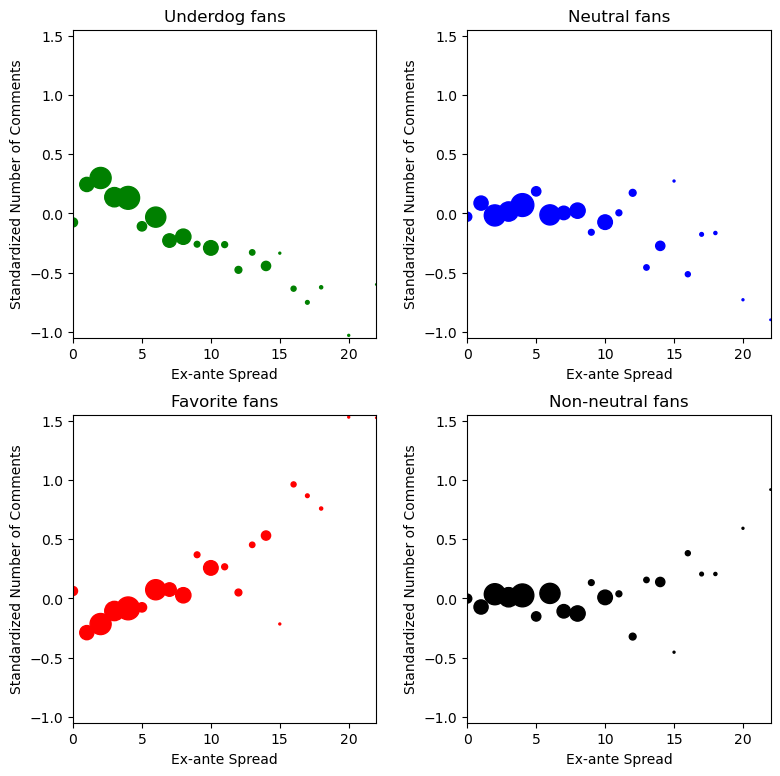

In [62]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25,'wspace':0.3})

weighted_all = True
filter_col_all = 'Ex-ante Spread'
round_num_all = 1

min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', round_num=round_num_all,
                        fans_list = ['num_underdog_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
                                       clr = 'g')

min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', round_num=round_num_all,
                        fans_list = ['num_neutral_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', round_num=round_num_all,
                        fans_list = ['num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
                                      clr = 'r')

min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', round_num=round_num_all,
                        fans_list = ['num_underdog_comments','num_favorite_comments'],
                        filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
                                      clr = 'black')

axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());

In [63]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

title='Non-neutral fans'
filter_col = 'Ex-ante Spread'
fans_list = ['num_underdog_comments','num_favorite_comments']
prop = False
round_num = 1
ax = None
weighted = True
clr = 'b'
custom_range = ()
    
if prop:
    scores = np.arange(0,1.01,0.01)
elif custom_range != ():
    scores = range(custom_range[0],custom_range[1])
else:
    scores = range(math.floor(df[filter_col].min()),math.ceil(df[filter_col].max())+1)

df['fans_col'] = df[fans_list[0]]
if len(fans_list) > 1:
    for fans in fans_list[1:]:
        df['fans_col'] = df['fans_col'] + df[fans]
df.loc[:,'fans_col_std'] = (df.loc[:,'fans_col']-np.mean(df.loc[:,'fans_col']))/np.std(df.loc[:,'fans_col'])

mean_fans_comments = []
num = []

for i in scores:
    smoll_df = df[custom_round(df[filter_col],round_num)==i]
    if len(smoll_df)==0:
        num.append(0)
        mean_fans_comments.append(np.nan)
    else:
        num.append(len(smoll_df))
        mean_fans_comments.append(smoll_df['fans_col_std'].mean())

temp_df_nonneutrals_spread = pd.DataFrame({'scores': scores,'mean_fans_comments': mean_fans_comments})
#temp_df_nonneutrals_spread = temp_df_nonneutrals_spread.assign(threshold=(temp_df["scores"] >= 0).astype(int))
temp_df_nonneutrals_spread.head()

,scores,mean_fans_comments
0,0,-0.000754
1,1,-0.071824
2,2,0.035934
3,3,0.010473
4,4,0.026071


In [64]:
group1 = temp_df_nonneutrals_scores['mean_fans_comments'].dropna() 
group2 = temp_df_nonneutrals_spread['mean_fans_comments'].dropna()

print(np.mean(group1),np.mean(group2))
print(np.mean(group2) - np.mean(group1))

print(stats.ttest_ind(group1,group2,equal_var=False))
mannwhitneyu(group1, group2)

-0.021797376020344733 0.0793013934210938
0.10109876944143853
TtestResult(statistic=-1.2882754805822916, pvalue=0.20463128429410835, df=42.42992195429231)


MannwhitneyuResult(statistic=756.0, pvalue=0.39232492097053195)

## Number of Comments vs Number of Switches

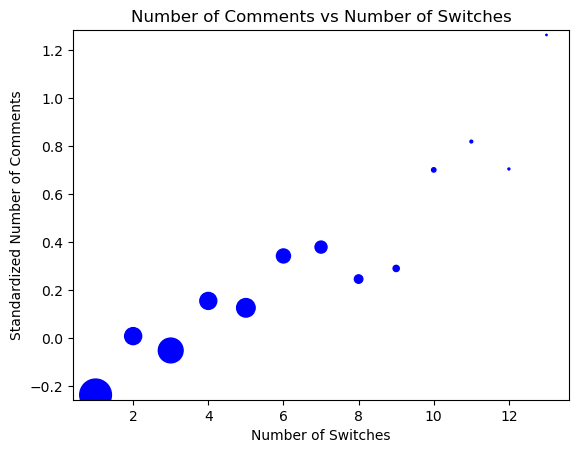

In [65]:
make_num_comments_graph(df, title='Number of Comments vs Number of Switches', filter_col = 'Number of Switches',round_num=1,
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

In [66]:
# fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

# weighted_all = True
# filter_col_all = 'Number of Switches'
# round_num_all = 1

# min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', round_num=round_num_all,
#                         fans_list = ['num_underdog_comments'],
#                         filter_col = filter_col_all, prop = False, ax = axs[0][0], weighted = weighted_all, 
#                                        clr = 'g')

# min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', round_num=round_num_all,
#                         fans_list = ['num_neutral_comments'],
#                         filter_col = filter_col_all, prop = False, ax = axs[0][1], weighted = weighted_all)

# min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', round_num=round_num_all,
#                         fans_list = ['num_favorite_comments'],
#                         filter_col = filter_col_all, prop = False, ax = axs[1][0], weighted = weighted_all,
#                                       clr = 'r')

# min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', round_num=round_num_all,
#                         fans_list = ['num_underdog_comments','num_favorite_comments'],
#                         filter_col = filter_col_all, prop = False, ax = axs[1][1], weighted = weighted_all,
#                                       clr = 'black')

# axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());
# # Split up switches and Proportion of Time Within 3 Points into if the match was won by the underdog or the favorite

## Number of Comments vs Proportion of Time within 3 points

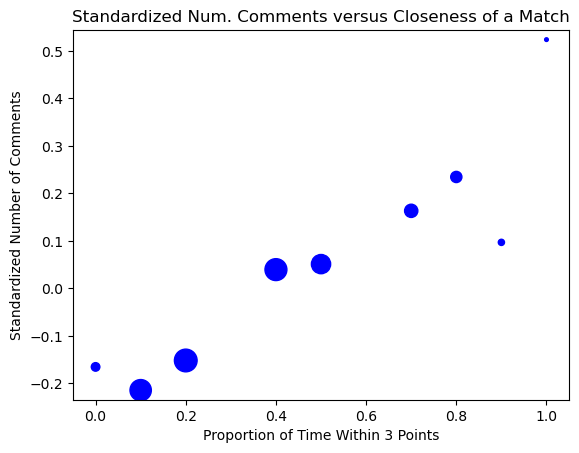

In [67]:
make_num_comments_graph(df, title='Standardized Num. Comments versus Closeness of a Match', 
                        filter_col = 'Proportion of Time Within 3 Points', prop = True, round_num = 0.1,
                        fans_list = ['num_underdog_comments','num_neutral_comments','num_favorite_comments']);

In [68]:
# fig, axs = plt.subplots(2, 2, figsize=(9, 9), gridspec_kw={'hspace': 0.25})

# weighted_all = True
# filter_col_all = 'Proportion of Time Within 3 Points'
# prop_all = True
# round_num_all = 0.1

# min_1, max_1 = make_num_comments_graph(df, title='Underdog fans', prop = prop_all, round_num = round_num_all,
#                         fans_list = ['num_underdog_comments'],
#                         filter_col = filter_col_all, ax = axs[0][0], weighted = weighted_all, 
#                                        clr = 'g')

# min_2, max_2 = make_num_comments_graph(df, title='Neutral fans', prop = prop_all, round_num = round_num_all,
#                         fans_list = ['num_neutral_comments'],
#                         filter_col = filter_col_all, ax = axs[0][1], weighted = weighted_all)

# min_3, max_3 = make_num_comments_graph(df, title='Favorite fans', prop = prop_all, round_num = round_num_all,
#                         fans_list = ['num_favorite_comments'],
#                         filter_col = filter_col_all, ax = axs[1][0], weighted = weighted_all,
#                                       clr = 'r')

# min_4, max_4 = make_num_comments_graph(df, title='Non-neutral fans', prop = prop_all, round_num = round_num_all,
#                         fans_list = ['num_underdog_comments','num_favorite_comments'],
#                         filter_col = filter_col_all, ax = axs[1][1], weighted = weighted_all,
#                                       clr = 'black')

# axs[0][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[0][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[0][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[0][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[1][0].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[1][0].set_xlim(df[filter_col_all].min(), df[filter_col_all].max())
# axs[1][1].set_ylim(min(min_1, min_2, min_3, min_4)-0.02, max(max_1,max_2, max_3, max_4)+0.02)
# axs[1][1].set_xlim(df[filter_col_all].min(), df[filter_col_all].max());